In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data Import
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-01-11 07:28:18--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-01-11 07:28:18 (45.3 MB/s) - ‘moore.csv’ saved [2302/2302]



### 2 Transformations are applied on the data

Log transformation:
*   $log(C) = log(r) * t + log (C_0)$

Normalize/ Standardize (Both x and y axes):
* $Z = \frac{x-μ}{σ}$

Questions to ask to understand the concept:

* Q1. what does r have to be, so that C doubles every 2 years?

* Q2. How does r relate to the slope of the line?

* Q3. How does normalization affect the slope of the line?

In [3]:
# Load in data
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:, 1].reshape(-1, 1)

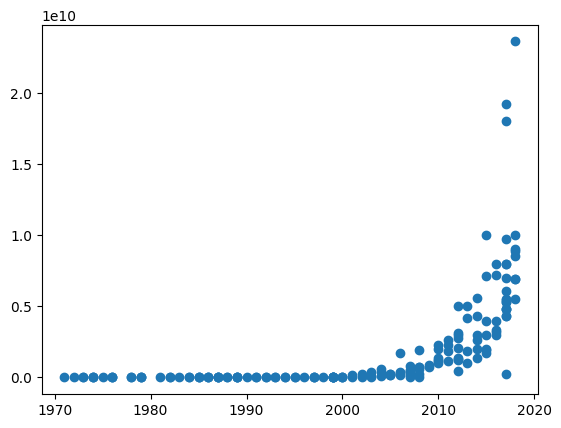

In [4]:
# Plotting data
# The data plot appears to be exponential
plt.scatter(X, Y)
plt.show()

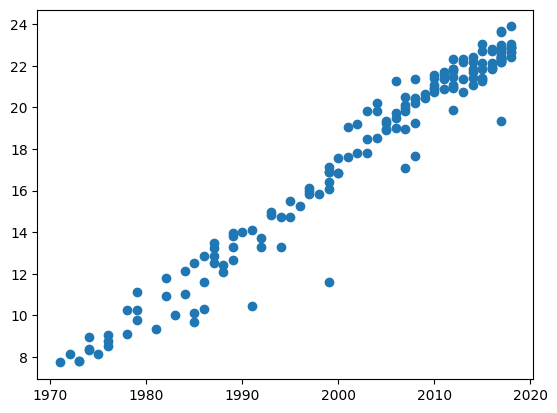

In [5]:
# We need to perform the log transformation to linearize it
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [6]:
# Now we standardize the data
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()

my = Y.mean()
sy = Y.std()

# Standardized values
X = (X - mx)/sx
Y = (Y - my)/sy

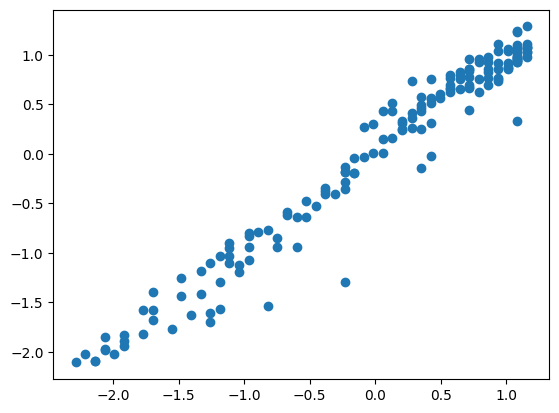

In [7]:
# Plotting after standardizing
plt.scatter(X, Y)
plt.show()
# All data is centered and in a small range

In [8]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [9]:
# Instantiating Linear Regression model
model = nn.Linear(1, 1)

In [10]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)


In [11]:
# Convert inputs and outputs from numpy to torch tensor datatypes

inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [12]:
type(inputs)

torch.Tensor

In [13]:
# Training model
n_epochs = 100
losses = []

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Recording loss
  losses.append(loss.item())

  #Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')



Epoch 1/100, Loss: 0.3928
Epoch 2/100, Loss: 0.3787
Epoch 3/100, Loss: 0.3558
Epoch 4/100, Loss: 0.3280
Epoch 5/100, Loss: 0.2982
Epoch 6/100, Loss: 0.2684
Epoch 7/100, Loss: 0.2399
Epoch 8/100, Loss: 0.2135
Epoch 9/100, Loss: 0.1896
Epoch 10/100, Loss: 0.1682
Epoch 11/100, Loss: 0.1494
Epoch 12/100, Loss: 0.1329
Epoch 13/100, Loss: 0.1187
Epoch 14/100, Loss: 0.1064
Epoch 15/100, Loss: 0.0959
Epoch 16/100, Loss: 0.0869
Epoch 17/100, Loss: 0.0793
Epoch 18/100, Loss: 0.0729
Epoch 19/100, Loss: 0.0674
Epoch 20/100, Loss: 0.0628
Epoch 21/100, Loss: 0.0589
Epoch 22/100, Loss: 0.0556
Epoch 23/100, Loss: 0.0528
Epoch 24/100, Loss: 0.0505
Epoch 25/100, Loss: 0.0486
Epoch 26/100, Loss: 0.0469
Epoch 27/100, Loss: 0.0456
Epoch 28/100, Loss: 0.0444
Epoch 29/100, Loss: 0.0435
Epoch 30/100, Loss: 0.0426
Epoch 31/100, Loss: 0.0420
Epoch 32/100, Loss: 0.0414
Epoch 33/100, Loss: 0.0409
Epoch 34/100, Loss: 0.0405
Epoch 35/100, Loss: 0.0402
Epoch 36/100, Loss: 0.0399
Epoch 37/100, Loss: 0.0397
Epoch 38/1

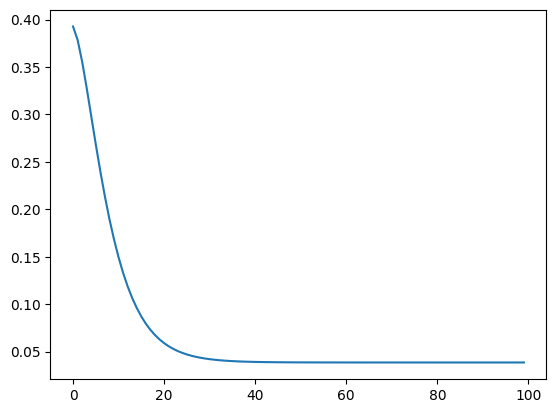

In [14]:
# Loss per iteration
plt.plot(losses)
plt.show()

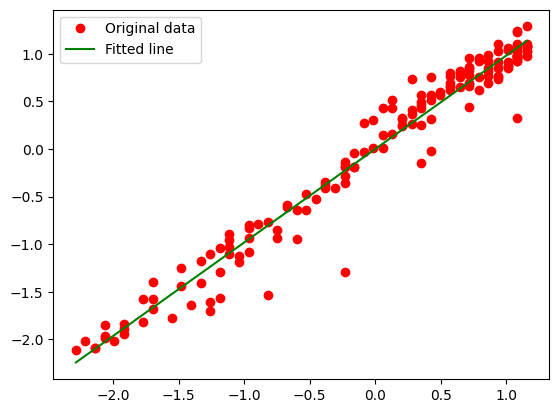

In [15]:
# Plot the predicted fit line with the originial data
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, color='g', label = 'Fitted line')
plt.legend()
plt.show()

In [16]:
# What does this number mean?
w = model.weight.data.numpy()
print(w) # A 2D array that holds a single number

[[0.980533]]


### Transforming back to original scale
Our original hypothesis was an exponential function of form:
$C = C_0 r^t$

[$C:$ Transistor count, $t:$ year, $C_0:$ originial count at year 0, and $r:$ rate of growth]

### Log transform to achieve linearized version

* $log(C) = log(C_0) + log(r) * t$

[ $log(C)$ is shown in y-axis and $t$ is shown on x-axis]

The above is the equation of best fit line:
* $y = ax + log(C_0)$

### The Model

#### Post normalization
$ y' = \frac{y-m_y}{S_y}$
$ x' = \frac{x-m_x}{S)_x}$

#### Resulting model
$ y' = wx' + b $

#### Recovering the original model

The orginial model can be recovered by substituing $x'$ and $y'$

* $\frac{y-m_y}{S_y} = w\frac{x-m_x}{S_x} + b$

after some manipulation we get:

* $y = w\frac{S_y}{S_x}x - w\frac{S_y}{S_x}m_x + bS_y + m_y = ax + log(C_0)  $

Based on the equation above
* $a = w\frac{S_y}{S_x}$
and
* $log(C_0) = - w\frac{S_y}{S_x}m_x + bS_y + m_y $

Since we are interested in the slope:
* $a = w\frac{S_y}{S_x}$

In [17]:
a = w[0, 0] * sy/sx    # Remember w is a 2D array holding a single value
print(a)

0.34166920462974665


### Exponential growth

When take the log of the exponential equation we get
* $log(C) = log(r) * t + log(C_0)$

* $y = ax + log(C_0)$

Where:
$y = log C$

$a = log r$
$x = t$

we are interested in r, as it is the rate of growth. Based on the regression weight.

* $a = 0.3415659983$

$ $r = e(0.3416599983)$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for C to increase to 2C

In [19]:
#print log(2) for understanding the principle of doubling

print("Time to double:" , np.log(2) / a)

Time to double: 2.028708385676963
